In [1]:
from glob import glob
from os import chdir
from os.path import basename

import pandas as pd
import numpy as np
from scipy.stats import fisher_exact
from matplotlib import font_manager
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import auc
from pqdm.processes import pqdm

chdir('/home/vladimirnoz/ibis')
g2a = set(pd.read_table('finals.tsv').query('`Primary Discipline` == "G2A"')['Transcription factor'])
HITS_THR = 10

font_files = font_manager.findSystemFonts(fontpaths='/home/vladimirnoz/Fonts/')
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
sns.set(style="ticks", font="lato")

In [2]:
def rename_teams(team):
    team_rename_map = {
        'BenchPressers': 'Bench Pressers',
        'BiologyImpostor': 'Biology Impostor',
        'ChatGPT': 'ChatGPTusers',
        'chiCkeNpoxgaNg': 'chiCkeN pox gaNg',
        'NaturalKiller': 'Natural Killer',
        'PostBioinformaticDisorder': 'Post Bioinformatic Disorder',
        'SalimovAndFrolovLaboratory': 'Salimov and Frolov Laboratory',
        'sbitwo': 'sbi two',
        'TheMotifvators': 'The Motifvators',
        'mex': 'MEX'
    }
    if team in team_rename_map:
        return team_rename_map[team]
    return team

In [3]:
file_path_list = glob('curves_plots/curves/*.tsv')

In [4]:
tables = []
for file_path in file_path_list:
    info = basename(file_path).replace('.tsv', '').split('@')
    df = pd.read_table(file_path)
    df['tf, team, model_type, discipline, submission'.split(', ')] = info
    df['team'] = rename_teams(info[1]).replace('.', ' ')
    if 'thr' in df.columns:
        df['threshold'] = df['thr']
    else:
        df['thr'] = df['threshold']
    tables.append(df)
df = pd.concat(tables)

In [21]:
order = ['tf', 'team', 'model_type', 'discipline']
def teams_sort_key(team):
    if team == 'sbi two':
        return 3
    elif team == 'MEX':
        return 2
    elif team == 'Salimov and Frolov Laboratory':
        return 0
    else:
        return 1
teams = sorted(list(set(df[order].itertuples(index=False, name=None))), key=lambda x: (x[0], x[2], teams_sort_key(x[1]), x[1], x[3]))

In [22]:
teams

[('GCM1', 'Salimov and Frolov Laboratory', 'AAA', 'A2G'),
 ('GCM1', 'Biology Impostor', 'AAA', 'A2G'),
 ('GCM1', 'Biology Impostor', 'PWM', 'A2G'),
 ('GCM1', 'MEX', 'PWM', 'A2G'),
 ('GCM1', 'sbi two', 'PWM', 'A2G'),
 ('MYF6', 'Medici', 'AAA', 'G2A'),
 ('MYF6', 'mj', 'AAA', 'G2A'),
 ('MYF6', 'RSAT', 'PWM', 'G2A'),
 ('MYF6', 'MEX', 'PWM', 'G2A'),
 ('MYF6', 'sbi two', 'PWM', 'G2A')]

/tmp/ipykernel_1068093/2216995735.py:18: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  sns.lineplot(data=data, x='hits', y='conc_ratio', hue='submission', ax=ax, palette=colors)
/tmp/ipykernel_1068093/2216995735.py:18: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  sns.lineplot(data=data, x='hits', y='conc_ratio', hue='submission', ax=ax, palette=colors)


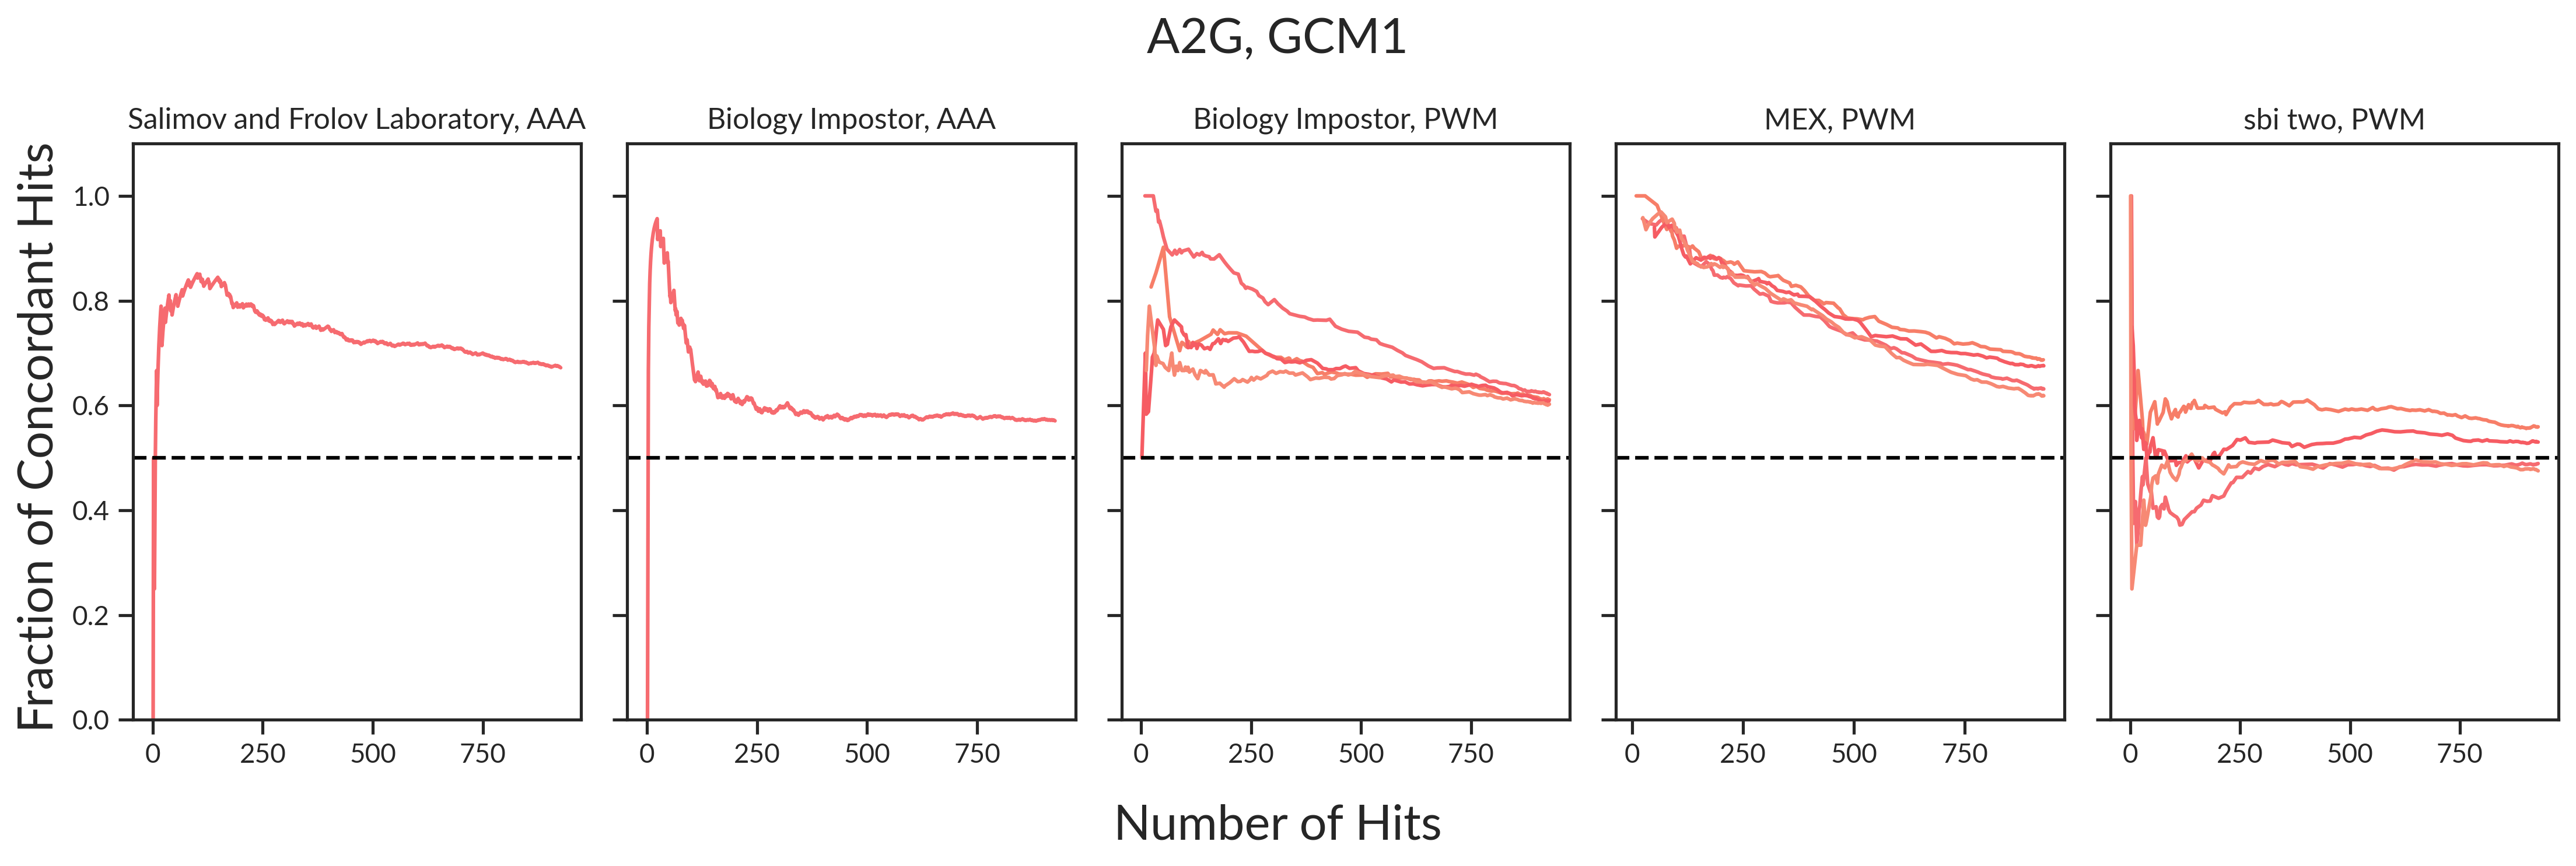

In [23]:
fig, axs = plt.subplots(1, 5, dpi=300, figsize=(15, 5), sharey=True)

colors = ["#F66B70", "#F77E68", "#F65C63", "#F78974"]
fig.supxlabel('Number of Hits', fontsize=20, y=0.03)
fig.supylabel('Fraction of Concordant Hits', fontsize=20)
fig.suptitle('A2G, GCM1', fontsize=20)
for i, info in enumerate(teams[:5]):
    ax = axs[i]

    ax.set_title(', '.join(info[1:3]), fontsize=12)
    mask = True
    for col, value in zip(order, info):
        mask = (df[col] == value) * mask
    data = df[mask]

    
    
    sns.lineplot(data=data, x='hits', y='conc_ratio', hue='submission', ax=ax, palette=colors)
    ax.get_legend().remove()
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.axhline(y=0.5, color='black', linestyle='--')
    ax.set_ylim([0, 1.1])

fig.tight_layout()
fig.savefig('curves_plots/A2G.png', bbox_inches='tight')
fig.savefig('curves_plots/A2G.pdf', bbox_inches='tight')

/tmp/ipykernel_1068093/2407843982.py:18: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  sns.lineplot(data=data, x='hits', y='conc_ratio', hue='submission', ax=ax, palette=colors)
/tmp/ipykernel_1068093/2407843982.py:18: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  sns.lineplot(data=data, x='hits', y='conc_ratio', hue='submission', ax=ax, palette=colors)


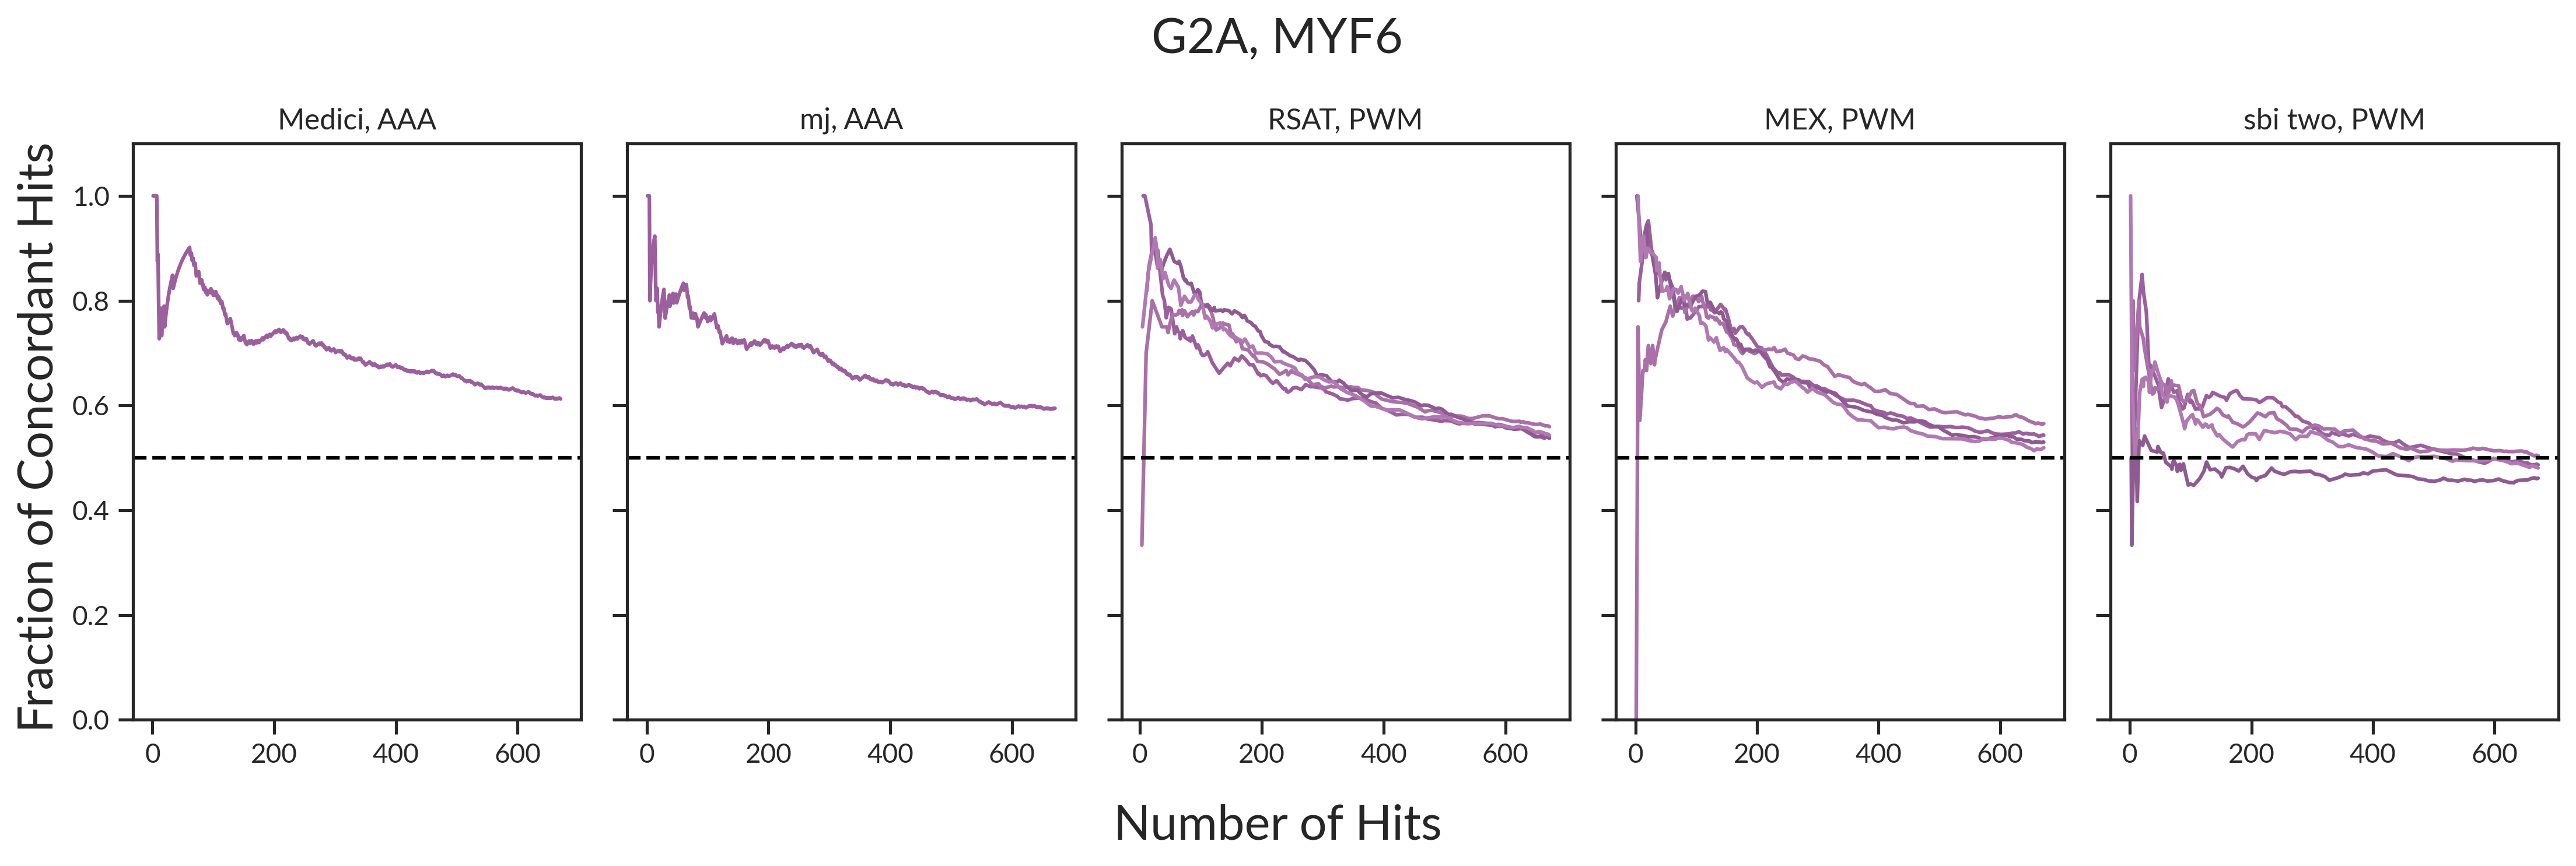

In [24]:
fig, axs = plt.subplots(1, 5, dpi=300, figsize=(15, 5), sharey=True)

colors = ["#9B5F9E", "#A971A8", "#8F5A91", "#B079B2"]
fig.supxlabel('Number of Hits', fontsize=20, y=0.03)
fig.supylabel('Fraction of Concordant Hits', fontsize=20)
fig.suptitle('G2A, MYF6', fontsize=20)
for i, info in enumerate(teams[5:]):
    ax = axs[i]

    ax.set_title(', '.join(info[1:3]), fontsize=12)
    mask = True
    for col, value in zip(order, info):
        mask = (df[col] == value) * mask
    data = df[mask]

    
    
    sns.lineplot(data=data, x='hits', y='conc_ratio', hue='submission', ax=ax, palette=colors)
    ax.get_legend().remove()
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.axhline(y=0.5, color='black', linestyle='--')
    ax.set_ylim([0, 1.1])

fig.tight_layout()
fig.savefig('curves_plots/G2A.png', bbox_inches='tight')
fig.savefig('curves_plots/G2A.pdf', bbox_inches='tight')